# <center> Perceptron Algorithm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [3]:
train_data = pd.read_csv("../data/perceptron_alg.csv", header = None)
train_data.columns = ["p", "q", "correctly_classified"]
train_data

,p,q,correctly_classified
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [4]:
train_data[train_data["correctly_classified"]==0]

,p,q,correctly_classified
50,0.55330,1.00000,0
51,0.44274,0.59205,0
52,0.85176,0.66120,0
53,0.60436,0.86605,0
54,0.68243,0.48301,0
55,1.00000,0.76815,0
56,0.72989,0.81070,0
57,0.67377,0.77975,0
58,0.78761,0.58177,0
59,0.71442,0.76680,0


In [6]:
train_data["X"] = list(zip(train_data["p"], train_data["q"]))

In [7]:
train_data

,p,q,correctly_classified,X
0,0.78051,-0.063669,1,"(0.78051, -0.063669)"
1,0.28774,0.291390,1,"(0.28774, 0.29139)"
2,0.40714,0.178780,1,"(0.40714, 0.17878)"
3,0.29230,0.421700,1,"(0.2923, 0.4217)"
4,0.50922,0.352560,1,"(0.50922, 0.35256)"
...,...,...,...,...
95,0.77029,0.701400,0,"(0.77029, 0.7014)"
96,0.73156,0.717820,0,"(0.73156, 0.71782)"
97,0.44556,0.579910,0,"(0.44556, 0.57991)"
98,0.85275,0.859870,0,"(0.85275, 0.85987)"


In [8]:
correct = train_data[train_data['correctly_classified']==1]
false = train_data[train_data['correctly_classified']==0]

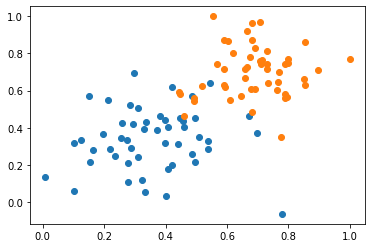

In [10]:
plt.figure()
plt.scatter(correct['p'], correct['q'], color='C0')
plt.scatter(false['p'], false['q'], color='C1')
plt.show()

### Setting the random seed, feel free to change it and see different solutions

In [11]:
np.random.seed(42)

### Define step and prediction functions

In [12]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

def prediction_int(X, W, b):
    return print((np.matmul(X, W).diagonal() + b)[0])

### Figure out how the calculation of """*SCORE = x1w1 + x2w2 +b*""" is achieved

In [13]:
X = np.array([(3,9), (2,2)])
W = np.array([(1,2), (3,3)]).transpose()

In [14]:
X

array([[3, 9],
       [2, 2]])

In [15]:
W

array([[1, 3],
       [2, 3]])

In [16]:
np.matmul(X,W).diagonal()

array([21, 12])

In [17]:
correct_values = [3+18, 6+6]
correct_values

[21, 12]

In [18]:
prediction_int(X, W, 0)

21


### Define the perceptronStep function to implement the Perceptron Trick

The function should receive as inputs the data X, the labels y,  the weights W (as an array), and the bias b, update the weights and bias W, b, according to the perceptron algorithm, and return W and b.

In [19]:
X = train_data["X"]
X[1]

(0.28774, 0.29139)

In [20]:
y = train_data["correctly_classified"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
for x, y_val in zip(X, y):
    print(x, y_val)

(0.78051, -0.063669) 1
(0.28774, 0.29139) 1
(0.40714, 0.17878) 1
(0.2923, 0.4217) 1
(0.50922, 0.35256) 1
(0.27785, 0.10802) 1
(0.27527, 0.33223) 1
(0.43999, 0.31245) 1
(0.33557, 0.42984) 1
(0.23448, 0.24986) 1
(0.0084492, 0.13658) 1
(0.12419, 0.33595) 1
(0.25644, 0.42624) 1
(0.4591, 0.40426) 1
(0.44547, 0.45117) 1
(0.42218, 0.20118) 1
(0.49563, 0.21445) 1
(0.30848, 0.24306) 1
(0.39707, 0.44438) 1
(0.32945, 0.39217) 1
(0.40739, 0.40271) 1
(0.3106, 0.50702) 1
(0.49638, 0.45384) 1
(0.10073, 0.32053) 1
(0.69907, 0.37307) 1
(0.29767, 0.69648) 1
(0.15099, 0.57341) 1
(0.16427, 0.27759) 1
(0.33259, 0.055964) 1
(0.53741, 0.28637) 1
(0.19503, 0.36879) 1
(0.40278, 0.035148) 1
(0.21296, 0.55169) 1
(0.48447, 0.56991) 1
(0.25476, 0.34596) 1
(0.21726, 0.28641) 1
(0.67078, 0.46538) 1
(0.3815, 0.4622) 1
(0.53838, 0.32774) 1
(0.4849, 0.26071) 1
(0.37095, 0.38809) 1
(0.54527, 0.63911) 1
(0.32149, 0.12007) 1
(0.42216, 0.61666) 1
(0.10194, 0.060408) 1
(0.15254, 0.2168) 1
(0.45558, 0.43769) 1
(0.28488, 0.52

In [22]:
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i, x, y_val, w, b in zip(range(len(X)), X, y, W, b):
        y_hat = prediction(X[i],W,b)
        if y_hat == 0 and y_val == 1:
            w[0] += learn_rate*x[0]
            w[1] += learn_rate*x[1]
            b_val += learn_rate
        elif y_hat == 1 and y_val == 0:
            w[0] -= learn_rate*x[0]
            w[1] -= learn_rate*x[1]
            b_val -= learn_rate
        else:
            pass
    return W, b

In [23]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

### This function runs the perceptron algorithm repeatedly on the dataset, and returns a few of the boundary lines obtained in the iterations, for plotting purposes.

In [425]:
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    print(W)
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines

In [426]:
trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25)

[[0.43194502]
 [0.29122914]]


[(array([1.52557867]), array([15.31263155])),
 (array([-0.60788007]), array([1.05193339])),
 (array([-0.64409394]), array([0.83509426])),
 (array([-0.66342936]), array([0.81056531])),
 (array([-0.67212186]), array([0.81694633])),
 (array([-0.6809523]), array([0.82342862])),
 (array([-0.67956006]), array([0.82577061])),
 (array([-0.67195432]), array([0.82603739])),
 (array([-0.67018172]), array([0.82788747])),
 (array([-0.66840117]), array([0.82974585])),
 (array([-0.6797052]), array([0.80051169])),
 (array([-0.67555198]), array([0.83796892])),
 (array([-0.68692253]), array([0.80839533])),
 (array([-0.69602932]), array([0.81458247])),
 (array([-0.7052766]), array([0.82086506])),
 (array([-0.71466762]), array([0.82724531])),
 (array([-0.72423382]), array([0.8340944])),
 (array([-0.73395975]), array([0.84105784])),
 (array([-0.74384945]), array([0.84813853])),
 (array([-0.75390707]), array([0.85533945])),
 (array([-0.75263913]), array([0.85794304])),
 (array([-0.7445244]), array([0.858239

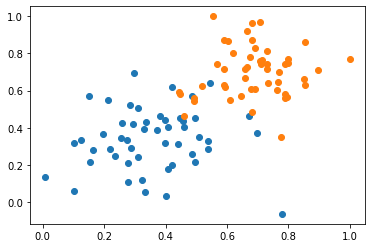

In [448]:
plt.figure()
plt.scatter(correct['p'], correct['q'], color='C0')
plt.scatter(false['p'], false['q'], color='C1')
plt.show()

In [450]:
boundary_lines = trainPerceptronAlgorithm(X,y)

[[0.37454012]
 [0.95071431]]


In [451]:
def abline(slope, intercept,i):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    if i == len(boundary_lines) - 1:
        plt.plot(x_vals, y_vals,color='black')
    else:
        plt.plot(x_vals, y_vals, '--',color='green')

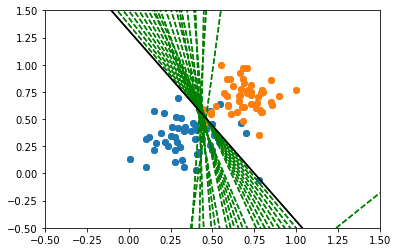

In [455]:
slope = [i[0][0] for i in boundary_lines]
intercepts = [i[1][0] for i in boundary_lines]

# plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='black',cmap='bwr')
plt.scatter(correct['p'], correct['q'], color='C0')
plt.scatter(false['p'], false['q'], color='C1')
plt.show()

for i in range(len(slope)):
    abline(slope[i],intercepts[i],i)